# Visualize evidence for model genes


## Setup
### Import packages

In [1]:
import re
from collections import defaultdict
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rbc_gem_utils import (CURATION_PATH, EXTERNAL_PATH, GEM_NAME,
                           INTERIM_PATH, RESULTS_PATH, ROOT_PATH, build_string,
                           compare_tables, get_annotation_df, read_cobra_model,
                           read_rbc_model, show_versions, split_string,
                           visualize_comparison)

# Display versions of last time notebook ran and worked
show_versions()
plt.rcParams["font.family"] = "Arial"


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
beautifulsoup4                       4.12.3
bio                                   1.6.2
cobra                                0.29.0
depinfo                               2.2.0
kaleido                               0.2.1
matplotlib                            3.8.2
memote                               0.17.0
networkx                              3.2.1
notebook                              7.0.7
openpyxl                              3.1.2
pandas                                2.2.0
pre-commit                            3.6.0
pyvis                                 0.3.2
rbc-gem-utils[database,network,vis] missing
requests                             2.31.0
scipy                                1.12.0
seaborn                              0.13.2

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
-------------------

## Load RBC-GEM model

In [2]:
data_path = Path("data").resolve()
models_path = Path("models").resolve()
figures_path = Path("figures").resolve()
version = "1.2.0"


ftype = "xml"
model = read_cobra_model(f"{models_path}/{GEM_NAME.replace('-', '_')}.{ftype}")
model

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-21


Name,RBC_GEM
Memory address,1492c6890
Number of metabolites,2157
Number of reactions,3275
Number of genes,820
Number of groups,78
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


In [3]:
# Turned into an xlsx where keys are sheet names and values are DataFrames representing the sheet
all_figure_data = {}
save_figures = True
imagetype = "png"
transparent = True
dpi = 600

## Load protein evidence tables

In [4]:
df_evidence = pd.read_csv(
    f"{data_path}/genes_evidence.tsv",
    sep="\t",
    index_col=0,
    dtype=str,
).fillna("")
all_figure_data["GeneEvidenceModel"] = df_evidence.copy()
df_evidence

,uniprot,ncbigene,hgnc.symbol,proteomic evidence (#studies),proteomic evidence (pubmed),references,notes
genes,,,,,,,
GAPDH,P04406,2597,GAPDH,27,pubmed:12362340;pubmed:14963112;pubmed:1686133...,pubmed:19430704,
HSPA8,P11142,3312,HSPA8,25,pubmed:12362340;pubmed:14963112;pubmed:1686133...,pubmed:33832207,
CA1,P00915,759,CA1,24,pubmed:14963112;pubmed:16861337;pubmed:1849451...,pubmed:10090333;pubmed:4958988;pubmed:4975695,
ALDH1A1,P00352,216,ALDH1A1,23,pubmed:16861337;pubmed:18399644;pubmed:1849451...,pubmed:17175089;pubmed:224930;pubmed:2776714;p...,
BLVRB,P30043,645,BLVRB,23,pubmed:12362340;pubmed:14963112;pubmed:1861456...,pubmed:10858451;pubmed:34598;pubmed:8117274,
...,...,...,...,...,...,...,...
SMPD3,Q9NY59,55512,SMPD3,0,,pubmed:22824271;pubmed:25075126,pubmed:25075126;pubmed:22824271
ST3GAL1,Q11201,6482,ST3GAL1,0,,pubmed:3084191;pubmed:5003667,
ST3GAL2,Q16842,6483,ST3GAL2,0,,pubmed:3084191;pubmed:5003667,


In [5]:
df_protein_table = pd.read_csv(
    f"{data_path}/proteomic_evidence_table.tsv",
    sep="\t",
    index_col=0,
    dtype=str,
)
df_protein_table.columns.name = "pubmed"
df_protein_table = df_protein_table.rename(
    {col: col.lstrip("pubmed:") for col in df_protein_table.columns}, axis=1
)
all_figure_data["ProteomicEvidenceAll"] = df_protein_table.copy()
df_protein_table

pubmed,12362340,14963112,16861337,18399644,18494517,18614565,19778645,22157974,22954596,23781972,...,31552303,33103907,33341364,33806028,35858567,36346805,37760001,37942280,38147558,38964323
Uniprot,,,,,,,,,,,,,,,,,,,,,
P04406,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,1
P11142,1,1,1,1,1,1,0,0,1,1,...,0,1,1,1,1,1,1,1,1,1
Q00013,1,1,1,0,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
P00915,0,1,1,0,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
P27105,1,1,1,1,0,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8NBM8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P29466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q8NBI6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create proteomic evidence table for figure
#### Sorted by publication year (original)

In [6]:
model_uniprot_ids = list(df_evidence["uniprot"].unique())
df_model_proteins = df_protein_table[
    df_protein_table.index.isin(model_uniprot_ids)
].copy()
for protein in df_model_proteins.index.symmetric_difference(model_uniprot_ids):
    # Proteins with no evidence should be given 0 values across studies.
    df_model_proteins.loc[protein, :] = 0

df_model_proteins = df_model_proteins.astype(int)

# Order by number of times a single  protein was detected across studies
protein_ids_ordered = (
    df_model_proteins.sum(axis=1).sort_values(ascending=False).index.values
)
df_model_proteins = df_model_proteins.loc[protein_ids_ordered, :]

# Transport for figure
df_model_proteins = df_model_proteins.T
df_model_proteins

Uniprot,P04406,P11142,P00915,P11166,P04040,P32119,P51148,P30043,P69905,P55072,...,P35558,P35499,P35354,P30793,P29474,P26045,P22748,P22732,P19634,Q9Y694
pubmed,,,,,,,,,,,,,,,,,,,,,
12362340,1,1,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
14963112,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
16861337,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
18399644,1,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18494517,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18614565,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19778645,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22157974,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22954596,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Reordered


In [7]:
# Order by number of proteins detected in a single study
df_model_proteins_reordered = df_model_proteins.T.copy()
pubmed_ids_ordered = (
    df_model_proteins_reordered.sum(axis=0).sort_values(ascending=False).index.values
)
df_model_proteins_reordered = df_model_proteins_reordered.loc[:, pubmed_ids_ordered]
df_model_proteins_reordered = df_model_proteins_reordered.T
df_model_proteins_reordered

Uniprot,P04406,P11142,P00915,P11166,P04040,P32119,P51148,P30043,P69905,P55072,...,P35558,P35499,P35354,P30793,P29474,P26045,P22748,P22732,P19634,Q9Y694
pubmed,,,,,,,,,,,,,,,,,,,,,
38964323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28689405,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
30327373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28263177,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
35858567,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
38147558,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33806028,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
24555563,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37942280,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Visualization

In [8]:
compare = True
overwrite = False

fontsize = 12
max_count = 20
min_count = 0

cmin, cmax = (0.05, 1)

edgecolor = "black"
edgewidth = 0.5
bar_size = 0.75
as_percentages = True
cmap = mpl.colormaps.get_cmap("terrain_r")
no_evidence_color = mpl.colors.to_rgba_array("xkcd:white")

df_model = df_model_proteins.copy()
df_model = df_model_proteins_reordered.copy()

all_figure_data["ProteomicEvidenceModel"] = df_model.copy()

df_model

Uniprot,P04406,P11142,P00915,P11166,P04040,P32119,P51148,P30043,P69905,P55072,...,P35558,P35499,P35354,P30793,P29474,P26045,P22748,P22732,P19634,Q9Y694
pubmed,,,,,,,,,,,,,,,,,,,,,
38964323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28689405,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
30327373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28263177,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
35858567,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
38147558,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33806028,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
24555563,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37942280,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
assert max_count <= len(
    df_model
), "Maximum count must be less than or equal to the total number of studies."
assert min_count >= 0, "Minimum count must be non-negative."
df_value_counts = df_model_proteins.sum(axis=0).value_counts().sort_index()

value_counts = df_value_counts[df_value_counts.index <= max_count].to_dict()
value_counts[max(value_counts.keys())] += df_value_counts[
    df_value_counts.index > max_count
].sum()
value_counts = {int(k): v for k, v in value_counts.items()}
df_value_counts = pd.Series(value_counts, name="Total")
id_fix_dict = {max_count: rf"$\geq${str(max_count)}"}
if min_count:
    value_counts = df_value_counts[df_value_counts.index >= min_count].to_dict()
    value_counts[min(value_counts.keys())] += df_value_counts[
        df_value_counts.index < min_count
    ].sum()
    value_counts = {int(k): v for k, v in value_counts.items()}
    id_fix_dict[min_count] = rf"{str(min_count)}$\geq$"

value_counts = {id_fix_dict.get(k, k): v for k, v in value_counts.items()}


df_additional = df_evidence.loc[
    :, ["uniprot", "proteomic evidence (#studies)", "references"]
].copy()
df_additional = df_additional.drop_duplicates().drop("uniprot", axis=1)
df_additional["references"] = df_additional["references"].apply(lambda x: int(bool(x)))
df_additional = df_additional.groupby("proteomic evidence (#studies)").sum()
df_additional = df_additional["references"].copy()
df_additional.index = df_additional.index.astype(int)
additional_evidence = df_additional[df_additional.index <= max_count].to_dict()
additional_evidence[max(additional_evidence.keys())] += df_additional[
    df_additional.index > max_count
].sum()
additional_evidence = {int(k): v for k, v in additional_evidence.items()}
df_additional = pd.Series(additional_evidence, name="Total")


if min_count:
    additional_evidence = df_additional[df_additional.index >= min_count].to_dict()
    additional_evidence[min(additional_evidence.keys())] += df_additional[
        df_additional.index < min_count
    ].sum()
    additional_evidence = {int(k): v for k, v in additional_evidence.items()}
additional_evidence = {id_fix_dict.get(k, k): v for k, v in additional_evidence.items()}


df_value_counts = pd.DataFrame(
    [], columns=["Total", "Additional evidence", "Only proteomic evidence"], dtype=str
)
for label, total in value_counts.items():
    df_value_counts.loc[label, "Total"] = total
    df_value_counts.loc[label, "Additional evidence"] = additional_evidence[label]
    df_value_counts.loc[label, "Only proteomic evidence"] = (
        total - additional_evidence[label]
    )
df_value_counts.index.name = "Proteomic evidence (#studies)"
df_value_counts.index = df_value_counts.index.astype(str)
all_figure_data["EvidenceSummaryModel"] = df_value_counts.copy()

df_value_counts

,Total,Additional evidence,Only proteomic evidence
Proteomic evidence (#studies),,,
0,96,96,0
1,67,35,32
2,51,24,27
3,37,21,16
4,33,13,20
5,36,15,21
6,31,14,17
7,31,22,9
8,24,14,10


### Add colormap to table

In [10]:
# Add colormap to table
cmap_dict = dict(
    zip(
        df_value_counts.index, cmap(np.linspace(cmin, cmax, len(df_value_counts.index)))
    )
)

df_value_counts_colors = df_value_counts.copy()
df_value_counts_colors["Colors"] = cmap_dict
df_value_counts_colors = df_value_counts_colors.reindex(
    index=df_value_counts_colors.index[::-1]
)

##### Colorbar legend

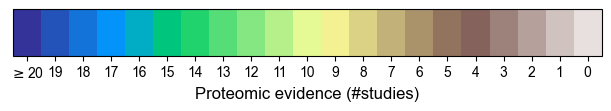

In [11]:
orientation = "horizontal"
figsize = (1 if orientation == "vertical" else 6, 6 if orientation == "vertical" else 1)
fig_colorbar, cbar_ax = plt.subplots(figsize=figsize, layout="constrained")

cmap_dict = df_value_counts_colors["Colors"].to_dict()
cmap_segmented = mpl.colors.LinearSegmentedColormap.from_list(
    "legend", list(cmap_dict.values()), len(cmap_dict)
)
xticks = list(np.linspace(0, len(cmap_dict) - 1, len(cmap_dict)) + 0.5)
if orientation == "vertical":
    cmap_segmented = cmap_segmented.reversed("legend")
    xticks.reverse()

norm = mpl.colors.BoundaryNorm(
    np.linspace(0, len(cmap_dict), len(cmap_dict) + 1), cmap_segmented.N
)
colorbar = fig_colorbar.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap_segmented),
    cax=cbar_ax,
    orientation=orientation,
    label=df_value_counts_colors.index.name,
)
colorbar.set_ticks(
    xticks, minor=False, labels=df_value_counts_colors.index, fontsize=fontsize - 2
)
colorbar.set_ticks([], minor=True)
cbar_ax.set_xlabel(df_value_counts_colors.index.name, fontdict={"size": fontsize})
fig_colorbar;

##### Protein evidence heatmap

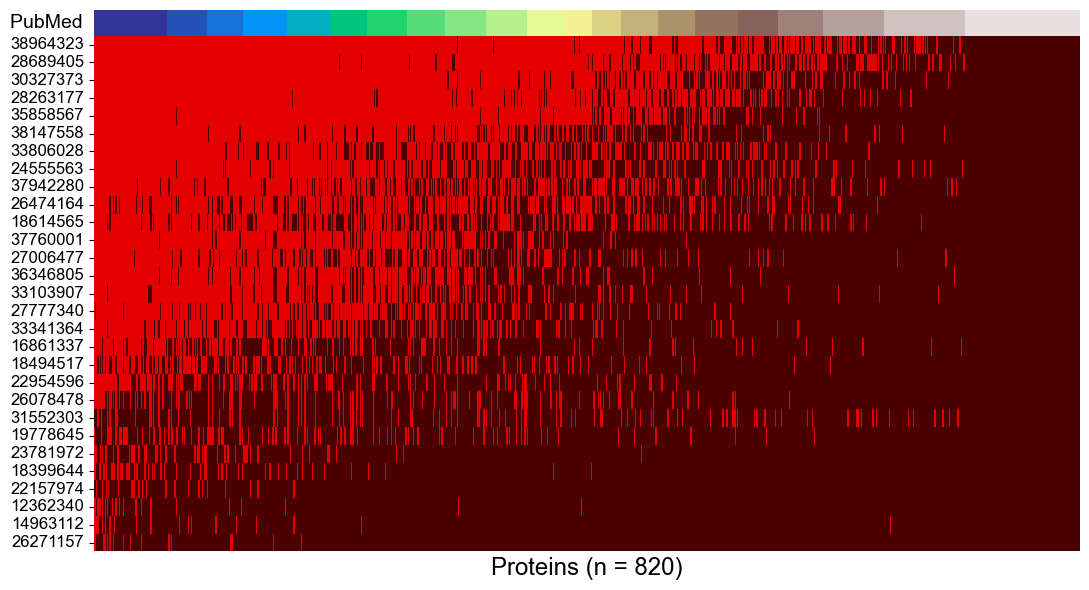

In [12]:
fig = mpl.figure.Figure(figsize=(11, 6))
gs = mpl.gridspec.GridSpec(2, 1, hspace=0, height_ratios=[0.05, 1])

df_proteomic_cmap = df_model.sum()
df_proteomic_cmap = df_proteomic_cmap.apply(lambda x: x if x < max_count else max_count)
df_proteomic_cmap = df_proteomic_cmap.apply(lambda x: x if x > min_count else min_count)

# Add col colors (similar to seaborn)
cmap_dict = df_value_counts_colors["Colors"].to_dict()
cmap_segmented = mpl.colors.LinearSegmentedColormap.from_list(
    "legend", [cmap_dict[c] for c in df_value_counts_colors.index[::-1]], len(cmap_dict)
)

ax_nstudies_colors = sns.heatmap(
    np.array([df_proteomic_cmap.values]),
    ax=fig.add_subplot(gs[0]),
    xticklabels=False,
    yticklabels=False,
    cmap=cmap_segmented,
    cbar=False,
)


ax_heatmap = sns.heatmap(
    df_model,
    ax=fig.add_subplot(gs[1]),
    cbar=False,
    cmap=mpl.colors.ListedColormap(["xkcd:dried blood", "xkcd:red"]),
    xticklabels=False,
)
ax_heatmap.set_xlabel(f"Proteins (n = {len(df_model.columns)})", fontsize="xx-large")
ax_heatmap.yaxis.tick_left()
ax_heatmap.tick_params(axis="y", labelsize="large")
ax_heatmap.set_ylabel(
    "PubMed ", ha="center", va="center", rotation=0, fontdict={"size": 14}
)
ax_heatmap.yaxis.set_label_coords(x=-0.045, y=1.025)

fig.tight_layout()
if save_figures:
    fig.savefig(
        f"{figures_path}/Fig3_PanelA_ModelProteomicEvidence.{imagetype}",
        transparent=transparent,
        format=imagetype,
        dpi=None if imagetype != "png" else dpi,
    )

fig

#### Barchart

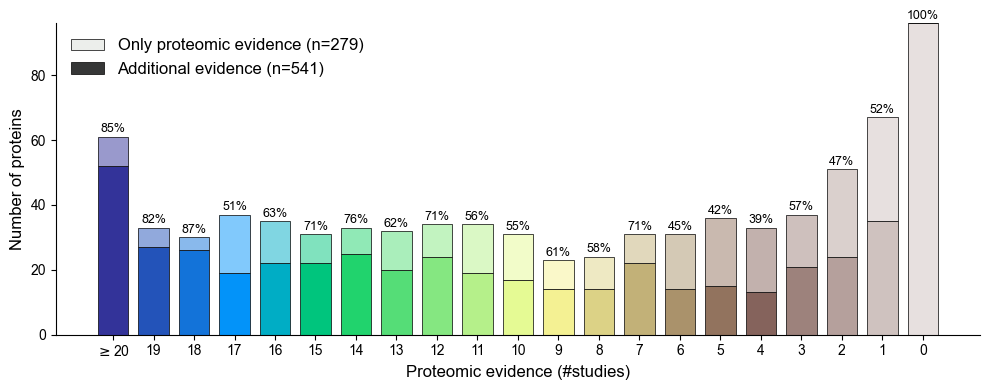

In [13]:
fig, ax_barchart = plt.subplots(1, 1, figsize=(10, 4))
sns.despine(fig)

has_additional_evidence_color, no_additional_evidence_color = (
    mpl.colors.to_rgba_array("xkcd:dark grey"),
    np.array([x / 2 + 0.5 for x in mpl.colors.to_rgba_array("xkcd:light grey")]),
)
column_names = ["Additional evidence", "Only proteomic evidence"]
cmaps = dict(zip(column_names, [{}, {}]))

try:
    no_evidence = df_value_counts_colors.loc["0"]["Only proteomic evidence"]
except KeyError as e:
    no_evidence = 0
for key, color in df_value_counts_colors["Colors"].to_dict().items():
    cmaps["Additional evidence"][key] = color
    cmaps["Only proteomic evidence"][key] = [x / 2 + 0.5 for x in color]
    if key == "0":
        #     cmaps["Additional evidence"][key] = has_additional_evidence_color
        cmaps["Only proteomic evidence"][key] = no_evidence_color

offset = np.zeros(len(df_value_counts_colors.index))
for idx, (label, series) in enumerate(df_value_counts_colors[column_names].items()):
    rects = ax_barchart.bar(
        list(series.index),
        list(series.values),
        bar_size,
        label=label,
        color=[cmaps[label][c] for c in series.index],
        bottom=offset,
        edgecolor=edgecolor,
        linewidth=edgewidth,
    )
    offset += list(series.values)
    if idx == 1:
        labels = [
            f"{v1/v2 * 100:.0f}%"
            for _, (v1, v2) in df_value_counts_colors[
                ["Additional evidence", "Total"]
            ].iterrows()
        ]
        ax_barchart.bar_label(rects, labels=labels, padding=1, fontsize=fontsize - 3)
df_evidence_counts = df_value_counts_colors[column_names].sum(axis=0)
df_evidence_counts["Only proteomic evidence"] -= no_evidence
handles = [
    mpl.patches.Patch(
        facecolor=facecolor,
        label=f"{label} (n={n})",
        edgecolor=edgecolor,
        linewidth=edgewidth,
    )
    for label, n, facecolor in zip(
        column_names,
        df_evidence_counts.values,
        [has_additional_evidence_color, no_additional_evidence_color],
    )
]
if no_evidence != 0:
    df_evidence_counts["No evidence"] = no_evidence
    handles += [
        mpl.patches.Patch(
            facecolor=no_evidence_color,
            label=f"No evidence (n={no_evidence})",
            edgecolor=edgecolor,
            linewidth=edgewidth,
        )
    ]
handles.reverse()
ax_barchart.legend(
    handles=handles,
    ncol=1,
    loc="best",
    # bbox_to_anchor=(0.5, 0., 0, 0),
    frameon=False,
    fontsize=fontsize,
)

ax_barchart.set_xlabel(df_value_counts_colors.index.name, fontsize=fontsize)
ax_barchart.set_ylabel(f"Number of proteins", fontsize=fontsize)
fig.tight_layout()
if save_figures:
    fig.savefig(
        f"{figures_path}/Fig3_PanelB_ModelProteomicEvidence.{imagetype}",
        transparent=transparent,
        format=imagetype,
        dpi=None if imagetype != "png" else dpi,
    )
fig;

#### Pie chart

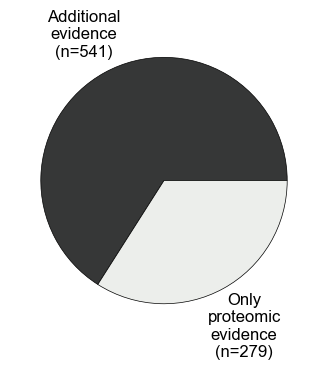

In [14]:
fig, pie_ax = plt.subplots(1, 1, figsize=(4, 4))
df_evidence_counts = df_value_counts_colors[column_names].sum(axis=0)
colors = [has_additional_evidence_color, no_additional_evidence_color]
if no_evidence != 0:
    df_evidence_counts["No evidence"] = no_evidence
    colors += [no_evidence_color]

pie_ax.pie(
    df_evidence_counts.values,
    labels=[
        "{}\n(n={})".format(label.replace(" ", "\n"), n)
        for label, n in df_evidence_counts.to_dict().items()
    ],
    textprops={"size": fontsize, "ha": "center", "va": "center"},
    colors=colors,
    labeldistance=1.35,
    wedgeprops={"edgecolor": edgecolor, "linewidth": edgewidth},
);

## Export Figures and Data

In [15]:
print(list(all_figure_data.keys()))
if save_figures:
    with pd.ExcelWriter(f"{data_path}/ModelProteomics.xlsx") as writer:
        for sheet_name, df in all_figure_data.items():
            df.to_excel(writer, sheet_name=sheet_name, index=True)

['GeneEvidenceModel', 'ProteomicEvidenceAll', 'ProteomicEvidenceModel', 'EvidenceSummaryModel']


## Aggregate Panels for visualization

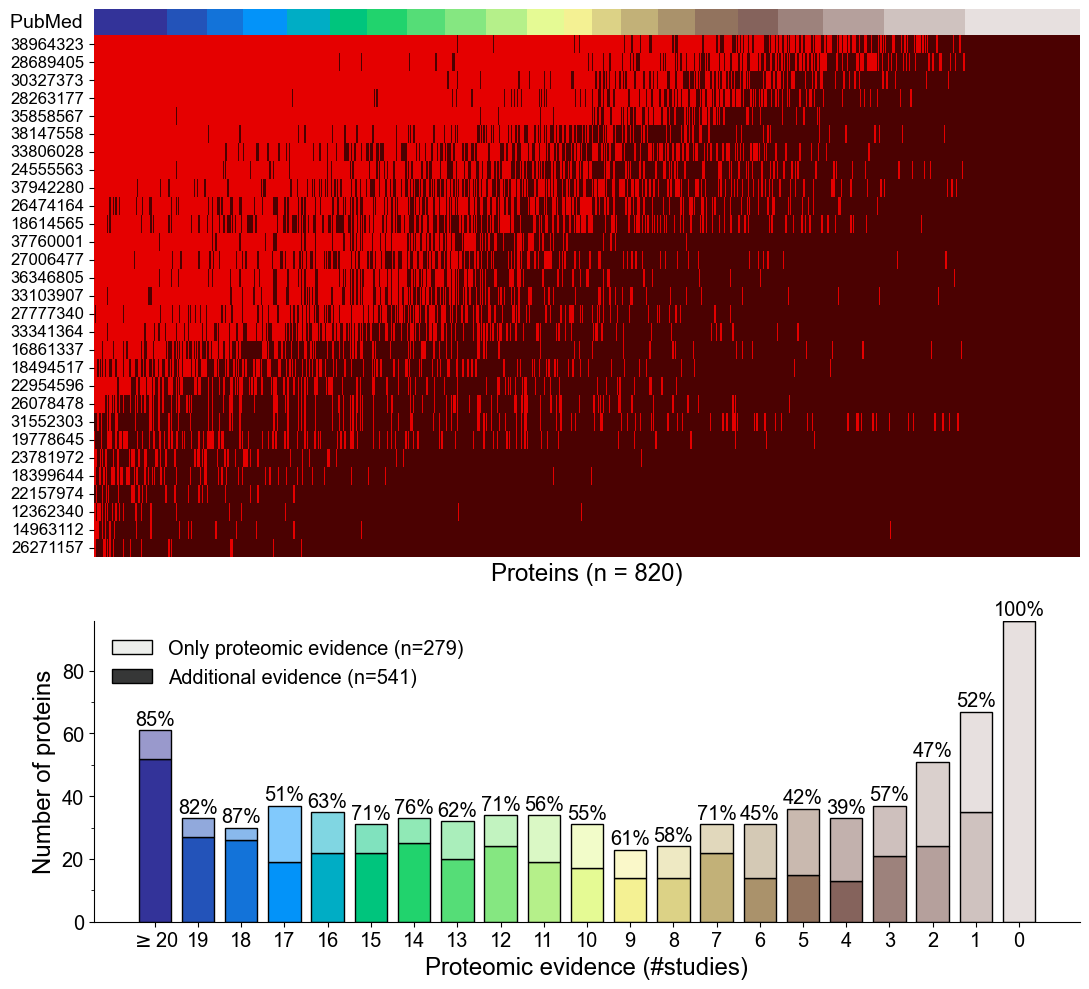

In [16]:
fig = mpl.figure.Figure(figsize=(11, 10))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 0.55])
sgs = mpl.gridspec.GridSpecFromSubplotSpec(
    2, 1, hspace=0, height_ratios=[0.05, 1], subplot_spec=gs[0]
)

has_additional_evidence_color, no_additional_evidence_color = (
    mpl.colors.to_rgba_array("xkcd:dark grey"),
    np.array([x / 2 + 0.5 for x in mpl.colors.to_rgba_array("xkcd:light grey")]),
)


df_proteomic_cmap = df_model.sum()
df_proteomic_cmap = df_proteomic_cmap.apply(lambda x: x if x < max_count else max_count)
df_proteomic_cmap = df_proteomic_cmap.apply(lambda x: x if x > min_count else min_count)

# Add col colors (similar to seaborn)
cmap_dict = df_value_counts_colors["Colors"].to_dict()
cmap_segmented = mpl.colors.LinearSegmentedColormap.from_list(
    "legend", [cmap_dict[c] for c in df_value_counts_colors.index[::-1]], len(cmap_dict)
)

ax_nstudies_colors = sns.heatmap(
    np.array([df_proteomic_cmap.values]),
    ax=fig.add_subplot(sgs[0]),
    xticklabels=False,
    yticklabels=False,
    cmap=cmap_segmented,
    cbar=False,
)


ax_heatmap = sns.heatmap(
    df_model,
    ax=fig.add_subplot(sgs[1]),
    cbar=False,
    cmap=mpl.colors.ListedColormap(["xkcd:dried blood", "xkcd:red"]),
    xticklabels=False,
)
ax_heatmap.set_xlabel(f"Proteins (n = {len(df_model.columns)})", fontsize="xx-large")
ax_heatmap.yaxis.tick_left()
ax_heatmap.tick_params(axis="y", labelsize="large")
ax_heatmap.set_ylabel(
    "PubMed ", ha="center", va="center", rotation=0, fontdict={"size": 14}
)
ax_heatmap.yaxis.set_label_coords(x=-0.045, y=1.025)
# ax_heatmap.set_xlabel(f"Model proteins (n = {len(df_model.columns)})", fontsize=fontsize+2)

# Barchart
edgewidth = 1
ax_barchart = fig.add_subplot(gs[1])
sns.despine(ax=ax_barchart)
column_names = ["Additional evidence", "Only proteomic evidence"]
cmaps = dict(zip(column_names, [{}, {}]))

try:
    no_evidence = df_value_counts_colors.loc["0"]["Only proteomic evidence"]
except KeyError as e:
    no_evidence = 0

for key, color in df_value_counts_colors["Colors"].to_dict().items():
    cmaps["Additional evidence"][key] = color
    cmaps["Only proteomic evidence"][key] = [x / 2 + 0.5 for x in color]
    if key == "0":
        #     cmaps["Additional evidence"][key] = has_additional_evidence_color
        cmaps["Only proteomic evidence"][key] = no_evidence_color

offset = np.zeros(len(df_value_counts_colors.index))
for idx, (label, series) in enumerate(df_value_counts_colors[column_names].items()):
    rects = ax_barchart.bar(
        list(series.index),
        list(series.values),
        bar_size,
        label=label,
        color=[cmaps[label][c] for c in series.index],
        bottom=offset,
        edgecolor=edgecolor,
        linewidth=edgewidth,
    )
    offset += list(series.values)
    if idx == 1:
        labels = [
            f"{v1/v2 * 100:.0f}%"
            for _, (v1, v2) in df_value_counts_colors[
                ["Additional evidence", "Total"]
            ].iterrows()
        ]
        ax_barchart.bar_label(rects, labels=labels, padding=1, fontsize="x-large")
df_evidence_counts = df_value_counts_colors[column_names].sum(axis=0)
df_evidence_counts["Only proteomic evidence"] -= no_evidence
handles = [
    mpl.patches.Patch(
        facecolor=facecolor,
        label=f"{label} (n={n})",
        edgecolor=edgecolor,
        linewidth=edgewidth,
    )
    for label, n, facecolor in zip(
        column_names,
        df_evidence_counts.values,
        [has_additional_evidence_color, no_additional_evidence_color],
    )
]
if no_evidence != 0:
    df_evidence_counts["No evidence"] = no_evidence
    handles += [
        mpl.patches.Patch(
            facecolor=no_evidence_color,
            label=f"No evidence (n={no_evidence})",
            edgecolor=edgecolor,
            linewidth=edgewidth,
        )
    ]
handles.reverse()
ax_barchart.legend(
    handles=handles,
    ncol=1,
    loc="upper left",
    frameon=False,
    fontsize="x-large",
)

ax_barchart.xaxis.set_tick_params(labelsize="x-large")
ax_barchart.set_yticks([0, 20, 40, 60, 80], minor=False)
ax_barchart.set_yticks([10, 30, 50, 70], minor=True)
ax_barchart.yaxis.set_tick_params(labelsize="x-large")
ax_barchart.set_xlabel(df_value_counts_colors.index.name, fontsize="xx-large")
ax_barchart.set_ylabel(f"Number of proteins", fontsize="xx-large")
fig.tight_layout()
if save_figures:
    fig.savefig(
        f"{figures_path}/Fig3_PanelAB_ModelProteomicEvidence.{imagetype}",
        transparent=transparent,
        format=imagetype,
        dpi=None if imagetype != "png" else dpi,
    )

fig